# Introduction

In sequence prediction challenges, Long Short Term Memory (LSTM) networks are a type of Recurrent Neural Network that can learn order dependence. The output of the previous step is used as input in the current step in RNN. Hochreiter & Schmidhuber created the LSTM. It addressed the issue of RNN long-term dependency, in which the RNN is unable to predict words stored in long-term memory but can make more accurate predictions based on current data. RNN does not provide an efficient performance as the gap length rises. The LSTM may keep information for a long time by default. It is used for time-series data processing, prediction, and classification.

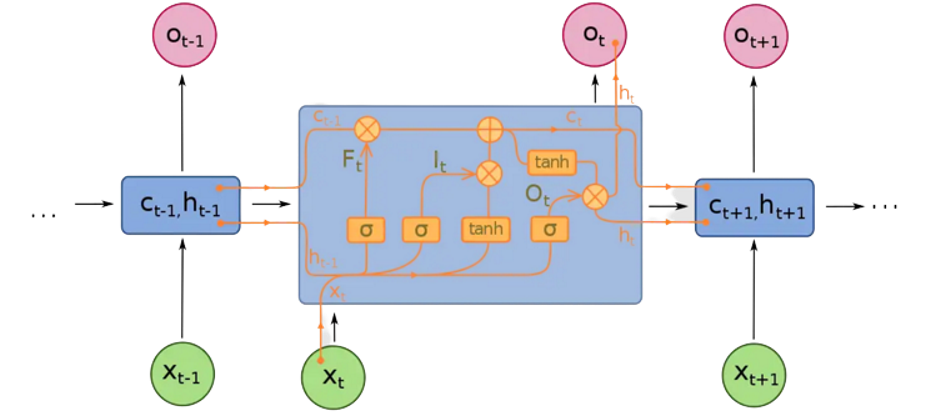

LSTM has feedback connections, unlike conventional feed-forward neural networks. It can handle not only single data points (like photos) but also complete data streams (such as speech or video). LSTM can be used for tasks like unsegmented, linked handwriting recognition, or speech recognition.

# Structure Of LSTM

The LSTM is made up of four neural networks and numerous memory blocks known as cells in a chain structure. A conventional LSTM unit consists of a cell, an input gate, an output gate, and a forget gate. The flow of information into and out of the cell is controlled by three gates, and the cell remembers values over arbitrary time intervals. The LSTM algorithm is well adapted to categorize, analyze, and predict time series of uncertain duration.

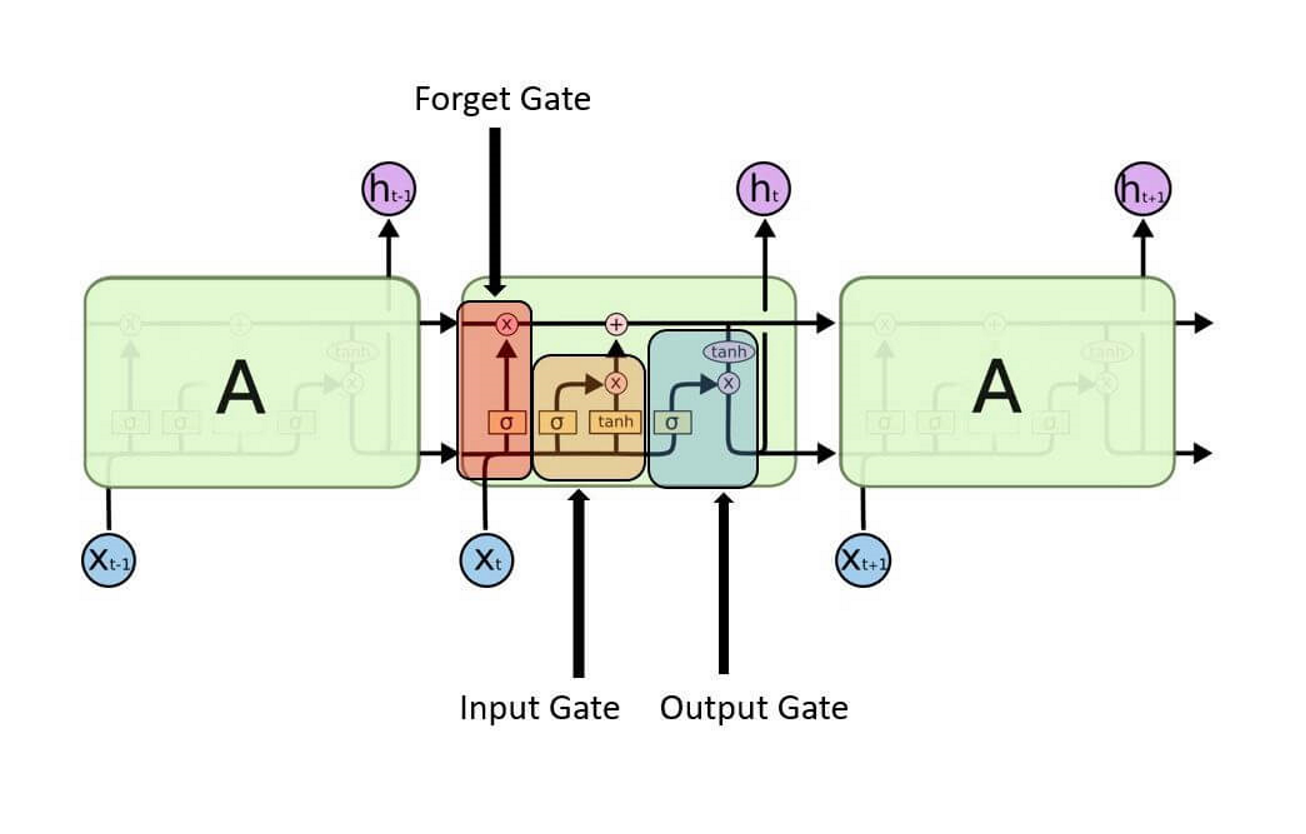

The cells store information, whereas the gates manipulate memory. There are three entrances:

## Input Gate: 
It determines which of the input values should be used to change the memory. The sigmoid function determines whether to allow 0 or 1 values through. And the tanh function assigns weight to the data provided, determining their importance on a scale of -1 to 1.
$$
i_t = \sigma (W_i.[h_t - 1, x_t] + b_i) $$
$$
c_t = tanh(W_c.[h_t - 1, x_t] + b_c)
$$

## Forget Gate: 
It finds the details that should be removed from the block. It is decided by a sigmoid function. For each number in the cell state $C_t-1$, it looks at the preceding state $(h_t-1)$ and the content input $(X_t)$ and produces a number between 0 (omit this) and 1 (keep this).
$$ f_t= \sigma (W_f.[h_t - 1, x_t] + b_f) $$

## Output Gate:
The block’s input and memory are used to determine the output. The sigmoid function determines whether to allow 0 or 1 values through. And the tanh function determines which values are allowed to pass through 0, 1. And the tanh function assigns weight to the values provided, determining their relevance on a scale of -1 to 1 and multiplying it with the sigmoid output.
$$ O_t = \sigma (W_o[h_t - 1, x_t] + b_o) $$
$$ h_t = o_t * tanh(C_t) $$

The recurrent neural network uses long short-term memory blocks to provide context for how the software accepts inputs and creates outputs. Because the program uses a structure based on short-term memory processes to build longer-term memory, the unit is dubbed a long short-term memory block. In natural language processing, these systems are extensively used.
For example, The recurrent neural network makes use of long short-term memory blocks to evaluate a single word or phoneme in the context of others in a string, where memory can aid in the filtering and categorization of certain types of data. In general, LSTM is a well-known and widely used idea in the development of recurrent neural networks.

# LSTM Networks

A sequence of repeating neural network modules makes up all recurrent neural networks. This repeating module in traditional RNNs will have a simple structure, such as a single tanh layer.
The output of the current time step becomes the input for the following time step, which is referred to as Recurrent. At each element of the sequence, the model examines not just the current input, but also what it knows about the prior ones.
A single layer exists in the repeating module of a conventional RNN:

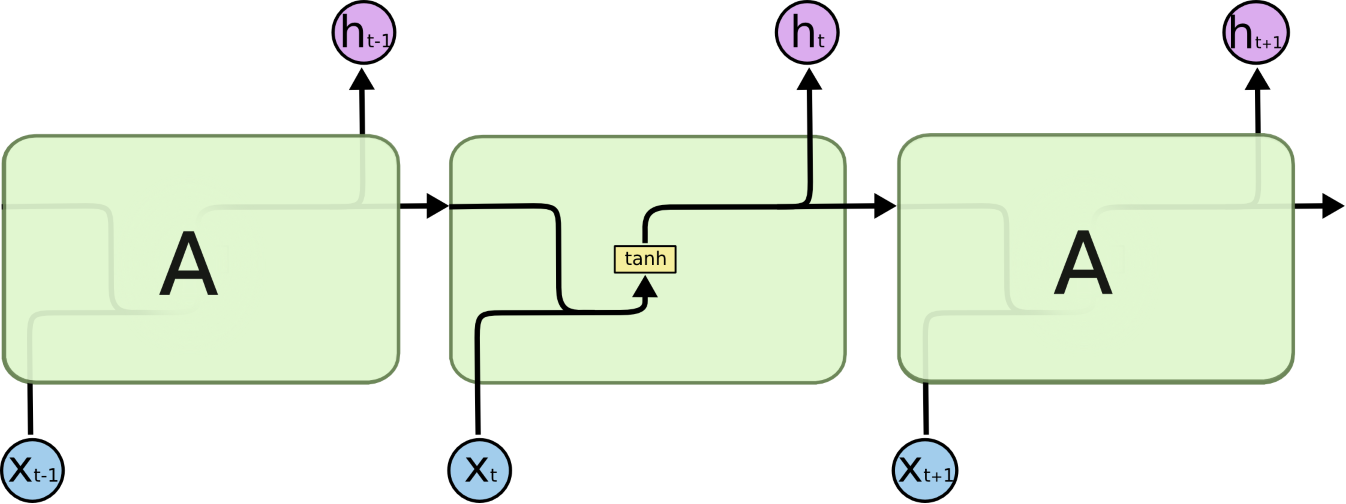

An LSTM’s repeating module is made up of four layers that interact with one another:

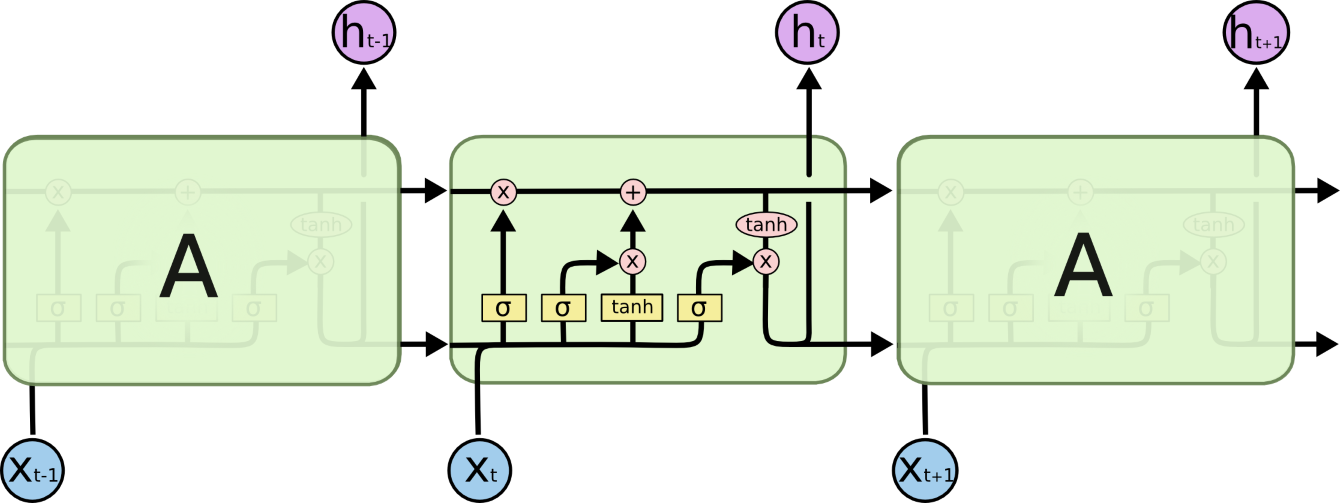

Source: Colah.com
• The cell state, represented by the horizontal line at the top of the diagram, is crucial to LSTMs.
• The state of the cell resembles that of a conveyor belt in certain ways. There are only a few tiny linear interactions as it travels down the entire chain. It’s quite easy for data to simply travel down it without being altered.
• The LSTM can delete or add information to the cell state, which is carefully controlled by structures called gates.
• Gates are a mechanism to selectively allow information to pass through. A sigmoid neural net layer plus a pointwise multiplication operation make them up.
• The sigmoid layer produces integers ranging from zero to one, indicating how much of each component should be allowed to pass. A value of zero indicates that “nothing” should be allowed through, whereas a value of one indicates that “everything” should be allowed through.
• Three of these gates are present in an LSTM to protect and govern the cell state.


## LSTM Cycle
The LSTM cycle is divided into four steps:
• Using the forget gate, information to be forgotten is identified from a prior time step.
• Using input gate and tanh, new information is sought for updating cell state.
• The information from the two gates above is used to update the cell state.
• The output gate and the squashing operation provide useful information.

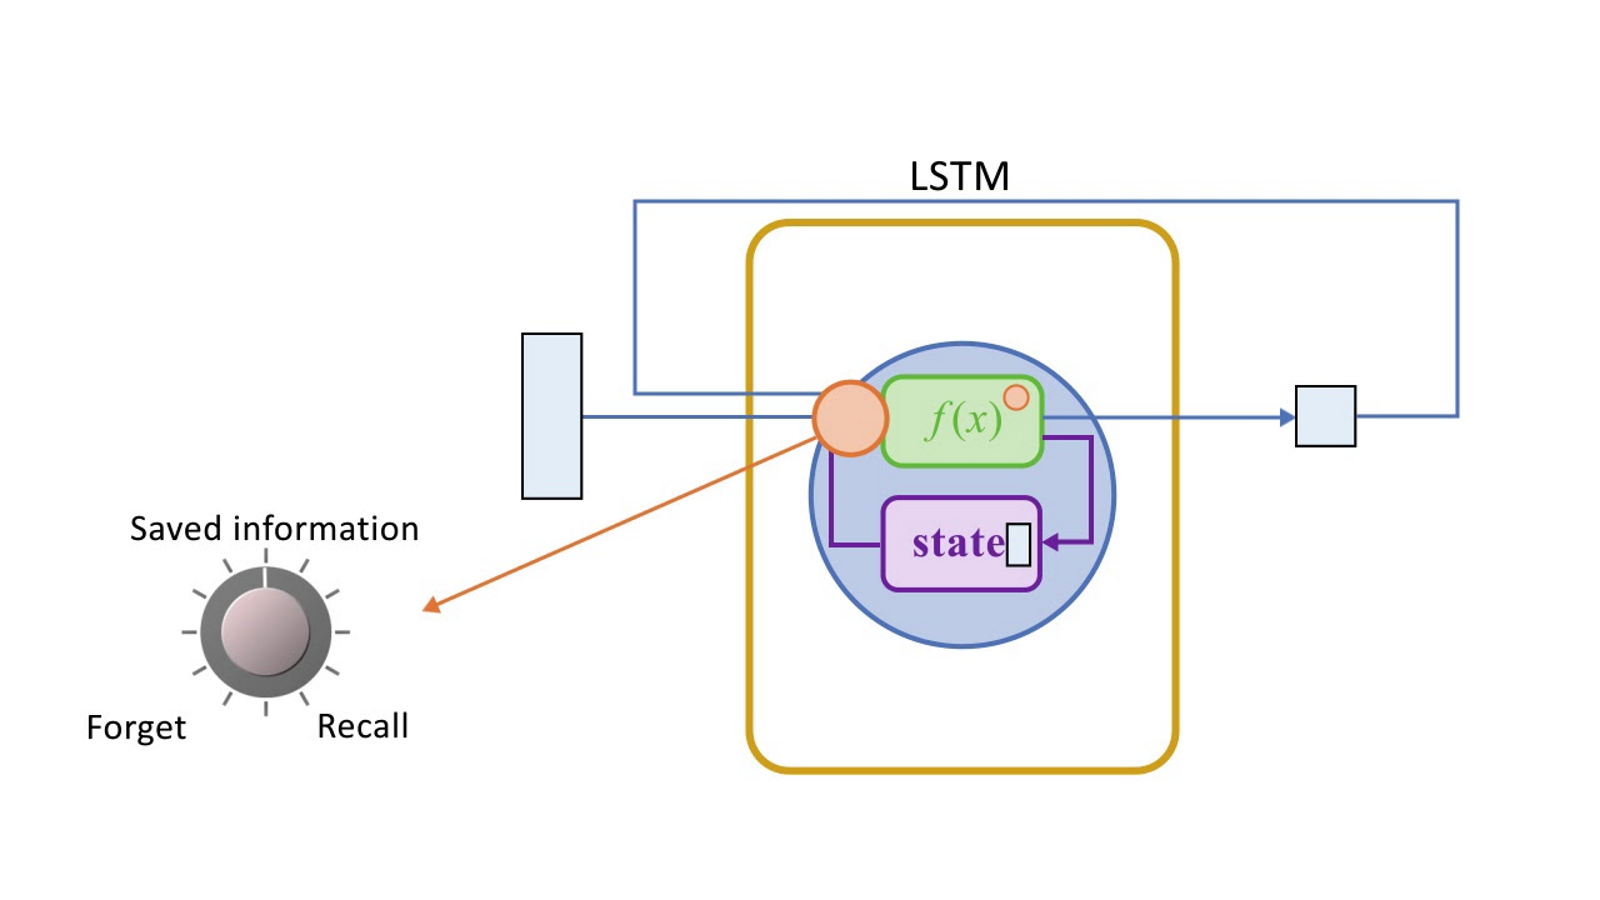

A dense layer receives the output of an LSTM cell. After the dense layer, the output stage is given the softmax activation function.

# Bidirectional LSTMs

Bidirectional LSTMs are an often discussed enhancement on LSTMs.
Each training sequence is presented forwards and backwards to two independent recurrent nets, both of which are coupled to the same output layer in Bidirectional Recurrent Neural Networks (BRNN). This means that the BRNN has comprehensive, sequential knowledge about all points before and after each point in a given sequence. There’s also no need to identify a (task-dependent) time window or goal delay size because the internet is free to use as much or as little of this context as it needs.

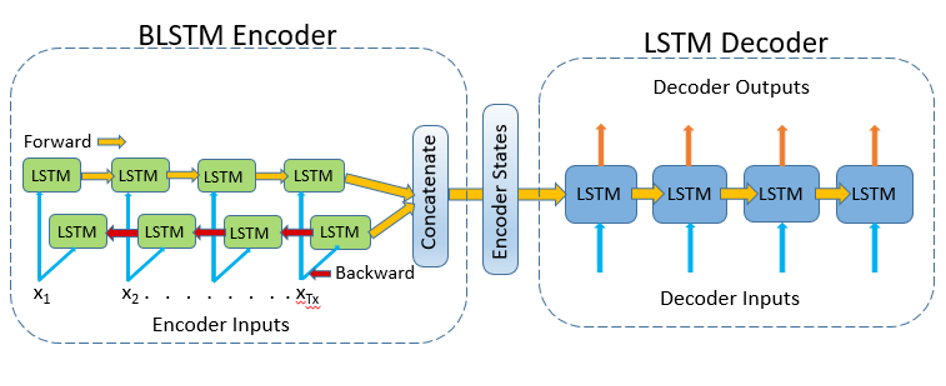

Conventional RNNs have the disadvantage of only being able to use the previous contexts. Bidirectional RNNs (BRNNs) do this by processing data in both ways with two hidden layers that feed-forward to the same output layer. When BRNN and LSTM are combined, you get a bidirectional LSTM that can access long-range context in both input directions.

## Applications
LSTM has a number of well-known applications, including:
1. Image captioning
2. Machine translation
3. Language modelling
4. Handwriting generation
5. Question answering chatbots

In [ ]:
# Basic Python Implementation
# Importing Some Relevant Libraries:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Embedding, Masking
model = Sequential()
# Embedding layer:
model.add(
    Embedding(input_dim=num_words,
              input_length = training_length,
              output_dim=100,
              weights=[embedding_matrix],
              trainable=False,
              mask_zero=True))
# Masking layer for pre-trained embeddings:
model.add(Masking(mask_value=0.0))
# Recurrent layer:
model.add(LSTM(64, return_sequences=False, 
               dropout=0.1, recurrent_dropout=0.1))
# Fully connected layer:
model.add(Dense(64, activation='relu'))
# Dropout for regularization:
model.add(Dropout(0.5))
# Output layer:
model.add(Dense(num_words, activation='softmax'))
# Compile the model:
model.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
## LSTM Model

import torch.nn as nn

class LSTMnet(nn.Module):
    def __init__(self, vocab_size, emb_dim, hidden_dim, output_dim, n_layers, bidirectional, dropout):

        super(LSTMnet, self).__init__()

        # Embedding layer construct integer sequences to vector sequences
        self.embedding = nn.Embedding(vocab_size, emb_dim)

        # LSTM layer process the vector sequences
        self.lstm = nn.LSTM(emb_dim, hidden_dim,
                            num_layers = n_layers,
                            bidirectional=bidirectional,
                            dropout=dropout,
                            batch_first = True)
        
        # Dense layer to predict
        self.fc = nn.Linear(hidden_dim*2, output_dim)

        # Prediction activation function
        self.sigmoid = nn.Sigmoid()

    def forward(self, text, text_lengths):
        embedded = self.embedding(text)

        # Thanks to packing, LSTM don't see padding tokens and this makes our model better
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, text_lengths.cpu(), batch_first = True)

        packed_output,(hidden_state, cell_state) = self.lstm(packed_embedded)

        # Concatenating the final forward and backward hidden states
        hidden =  torch.cat((hidden_state[-2,:,:], hidden_state[-1,:,:]), dim=1)

        dense_outputs = self.fc(hidden)

        # final activation function
        outputs = self.sigmoid(dense_outputs)

        return outputs


## Conclusion
- Long short-term memory (LSTM) is a deep learning architecture based on an artificial recurrent neural network (RNN).
- LSTMs are a viable answer for problems involving sequences and time series.
- The difficulty in training them is one of its disadvantages since even a simple model takes a lot of time and system resources to train. However, this is only a hardware constraint.
- The problem with traditional RNNs is that they can only use the prior contexts. BRNNs (Bidirectional RNNs) accomplish this by processing data in both directions.